In [3]:
import pandas as pd
import numpy as np
import json  
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
wikidata = pd.read_json('wikidata-movies.json.gz', orient='record', lines=True)
genres = pd.read_json('genres.json.gz', orient='record', lines=True)
rotten = pd.read_json('rotten-tomatoes.json.gz', orient='record', lines=True)
omdb = pd.read_json('omdb-data.json.gz', orient='record', lines=True)

# omdb has the ====== imdb_id  and the plot is also there in it 
# rotten has the imdb_is and rotten_tomato_id
# genres has the wikidata_id
# wikidata has the imdb_id, wiki_id and the rotten_tomato_id




In [5]:
movies = wikidata.merge(rotten, how='outer', on='imdb_id').merge(omdb, how='outer', on='imdb_id').merge(genres, how='outer', on='wikidata_id')
movies

,based_on,cast_member,country_of_origin,director,enwiki_title,filming_location,genre,imdb_id,label,made_profit,...,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,rotten_tomatoes_id_y,omdb_awards,omdb_genres,omdb_plot,genre_label
0,NaN,"[Q228931, Q235384]",Q145,[Q43079418],If I Were You (2012 Canadian film),NaN,[Q859369],tt1587309,If I Were You,NaN,...,3.9,72.0,244.0,3.7,9.0,m/if_i_were_you_2012,NaN,NaN,NaN,NaN
1,NaN,NaN,Q30,NaN,Krampus: The Devil Returns,NaN,[Q28026639],tt3527772,Krampus: The Devil Returns,NaN,...,1.8,24.0,31.0,NaN,NaN,m/krampus_the_devil_returns,NaN,NaN,NaN,NaN
2,NaN,"[Q106303, Q467957, Q3345693, Q3340838, Q316419...",Q142,[Q724208],Le Brio,[Q50742],[Q157443],tt6462462,NaN,NaN,...,3.4,67.0,13.0,6.7,80.0,m/le_brio,NaN,NaN,NaN,NaN
3,NaN,NaN,Q30,[Q4718041],A Christmas Prince,NaN,"[Q860626, Q28026639]",tt7608418,A Christmas Prince,NaN,...,3.2,48.0,198.0,6.5,83.0,m/a_christmas_prince,NaN,NaN,NaN,NaN
4,Q7162696,NaN,Q252,[Q11036795],Pengabdi Setan (2017 film),NaN,[Q200092],tt7076834,Pengabdi Setan,NaN,...,4.0,77.0,39.0,NaN,NaN,m/satans_slaves,NaN,NaN,NaN,NaN
5,NaN,NaN,Q258,NaN,A Small Town Called Descent,NaN,[Q959790],tt3726330,A Small Town Called Descent,NaN,...,NaN,NaN,0.0,NaN,NaN,m/a_small_town_called_descent,NaN,NaN,NaN,NaN
6,NaN,"[Q5126010, Q3390414, Q5676024, Q237021]",Q29,[Q51892574],Orbiter 9,NaN,"[Q24925, Q21010853]",tt3469798,Orbiter 9,0.0,...,3.1,41.0,60.0,5.5,60.0,m/orbiter_9,2 nominations.,"[Drama, Romance, Sci-Fi]",Helena is a young girl who spent all her life ...,NaN
7,Q18214949,"[Q202381, Q7367121, Q179576, Q20630818, Q28474...",Q30,[Q18608206],The Kindergarten Teacher (2018 film),NaN,[Q130232],tt6952960,The Kindergarten Teacher,NaN,...,NaN,NaN,27.0,7.7,92.0,m/the_kindergarten_teacher_2018,NaN,NaN,NaN,NaN
8,NaN,NaN,Q30,[Q22073902],Who the Fuck Is That Guy? The Fabulous Journey...,NaN,[Q93204],tt4958390,Who the Fuck is That Guy? The Fabulous Journey...,NaN,...,3.7,69.0,35.0,NaN,NaN,m/who_the_fk_is_that_guy_the_fabulous_journey_...,N/A,"[Documentary, Music]",'Who The Fuck Is That Guy'? The Fabulous Journ...,NaN
9,NaN,NaN,Q30,NaN,The Black Dove,NaN,[Q130232],tt1844790,The Black Dove,NaN,...,NaN,NaN,9.0,NaN,NaN,m/the_black_dove,NaN,NaN,NaN,NaN


In [6]:
rotten.head()

,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,imdb_id,rotten_tomatoes_id
0,3.9,86.0,33125227.0,7.1,79.0,tt0325980,m/pirates_of_the_caribbean_the_curse_of_the_bl...
1,4.1,80.0,2139.0,7.8,88.0,tt4882376,m/first_they_killed_my_father_a_daughter_of_ca...
2,3.6,71.0,11482.0,7.6,86.0,tt0099763,m/henry_portrait_of_a_serial_killer
3,3.6,66.0,187204.0,6.6,66.0,tt1371111,m/cloud_atlas_2012
4,3.9,84.0,26836.0,7.4,80.0,tt1189073,m/the_skin_i_live_in


/Users/ronitchawla/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ronitchawla/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


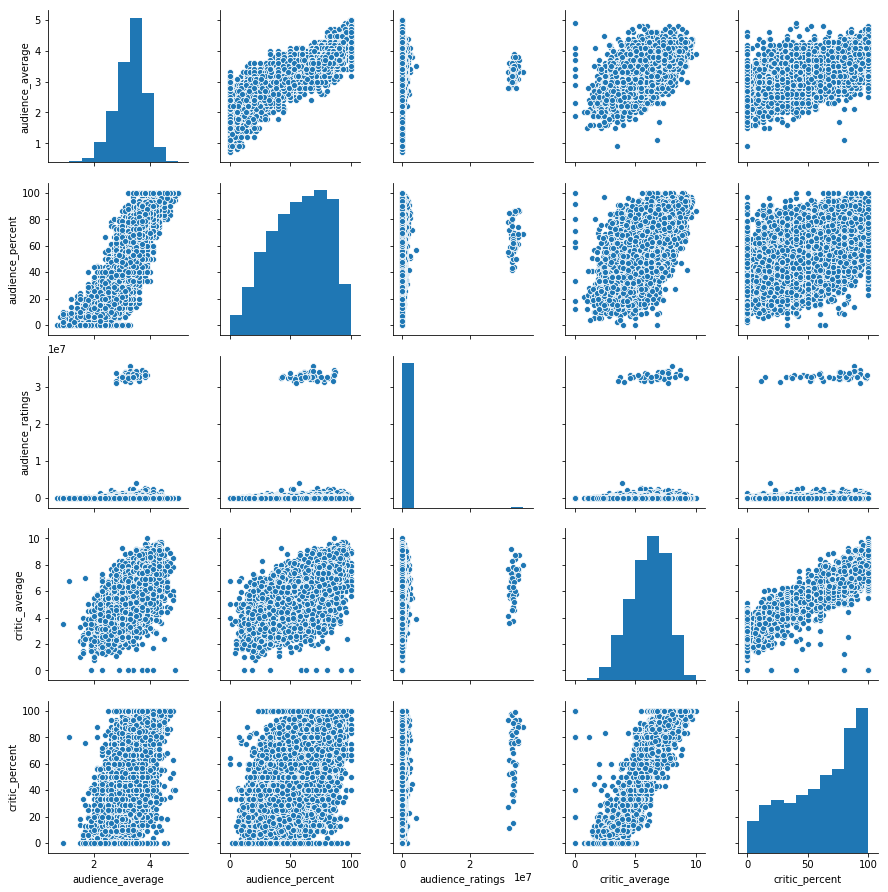

In [7]:
fig_pair=sns.pairplot(rotten) #used to check which columns are closely co-related.
fig_pair.savefig("output_paiplot.png")


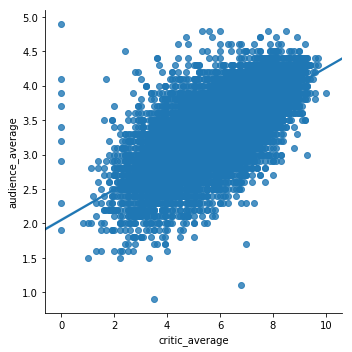

In [8]:
fig=sns.lmplot(x='critic_average',y='audience_average',data=rotten) #shows the linearity between audience and critic average ratting
fig.savefig("output.png")

In [9]:
#sns.heatmap(movies.isnull(), cbar=False) #shows all the null values in the dataframe 

In [10]:
#filtering out the NaN and NA
movies = movies.dropna(subset=['omdb_awards'])
movies = movies[movies['omdb_awards'] != 'N/A']

In [11]:
#seperating all the awards 
def awards(x):
    awards = re.findall(r'\d+',x) 
    awards = list(map(int, awards)) 
    total = np.sum(awards)
    return total
movies['Awards'] = movies['omdb_awards'].apply(awards)


In [12]:
# filtering out the ratings
movies = movies.dropna(subset=['audience_average','critic_average']) # dropped all the null values
movies['critic_average'] = movies['critic_average']/2.0 # converted the rating out of 5

In [13]:
#fig=sns.heatmap(movies.isnull(), cbar=False) # cross checking if there are still any null values in the ratings, after filtering the data
#fig.savefig("output.png")

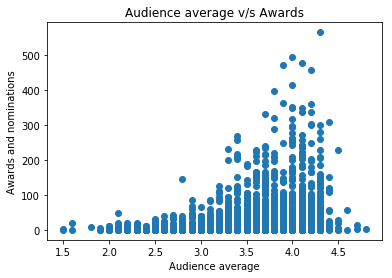

In [14]:
plt.scatter(movies['audience_average'],movies['Awards'])
plt.title('Audience average v/s Awards')
plt.xlabel('Audience average')
plt.ylabel('Awards and nominations')
plt.savefig('fig1.png')


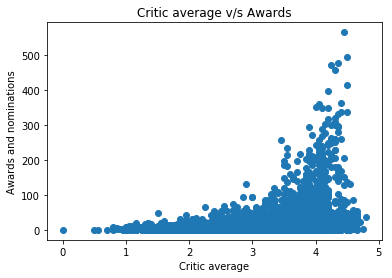

In [15]:
plt.scatter(movies['critic_average'],movies['Awards'])
plt.title('Critic average v/s Awards')
plt.xlabel('Critic average')
plt.ylabel('Awards and nominations')
plt.savefig('fig2.png')